## Ensemble Models, Gradient Boosting & XGBoost (eXtreme Gradient Boosting)

Topics:

1. What are Ensembles?
2. Concept of Gradient Boosting 
3. Boosting Algorithm
4. Gradient boosting applications and limitations
5. XGBoost

### Gradient Boosting
* Gradient Boosting is a powerful Ensemble based supervised learning algorithm
* For both classification and regression

#### Ensembles in machine learning are all about "Unity is strength"

* Based on the hypothesis that combining multiple models together can often produce a much more powerful model
* Diversity of models is good. 
    - Improve accuracy
    - Reduce bias and/or variance
* Different ways of ensembles
    - bagging
    - boosting
    - stacking
    
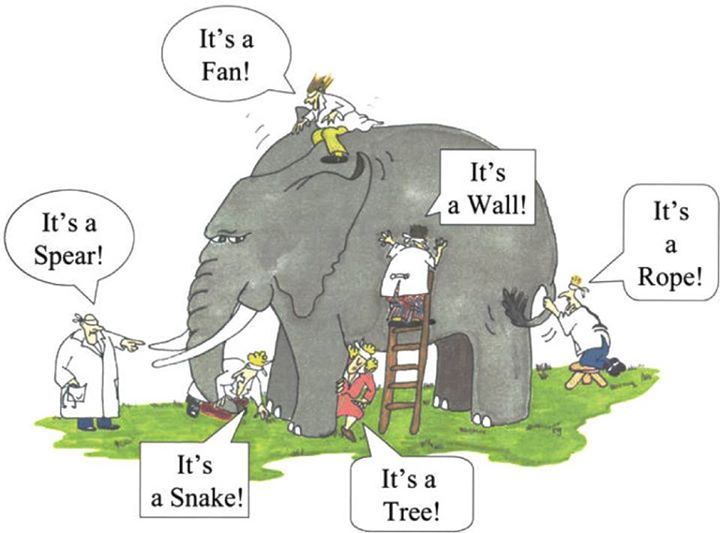

    
#### Some basic concepts

* Strong learners (strong models)
* Weak learners (weak models)
    - low degree of freedom models - high bias models
    - high degree of freedom models - high variance models

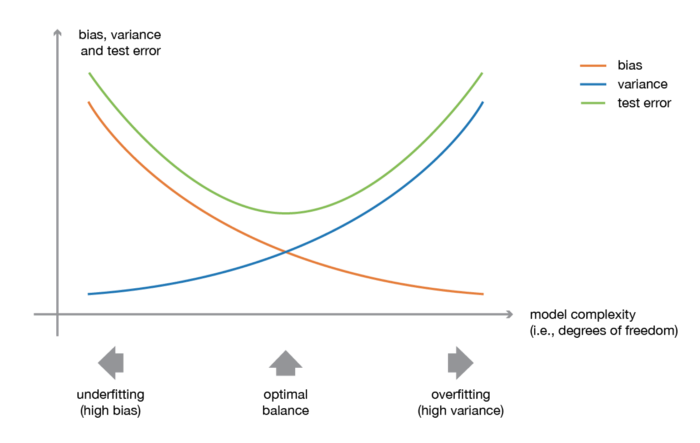

#### Combine weak models

* The main hypothesis is that when weak models are <b><u>correctly combined</u></b> we can obtain more accurate and/or robust models.
* If done correctly, We hope the ensemble model (strong model) reduce bias and/or variance of week learners
* homogeneous ensemble model
    - a single base learning algorithm is used so that we have homogeneous weak learners that are trained in different ways
* heterogeneous ensemble model
    - different type of base learning algorithms

#### Different ways of ensembles

* **Bagging**
    - that often considers homogeneous weak learners, learns them `independently from each other in parallel` and combines them following some kind of deterministic `averaging` process
    - such as random forest
    
    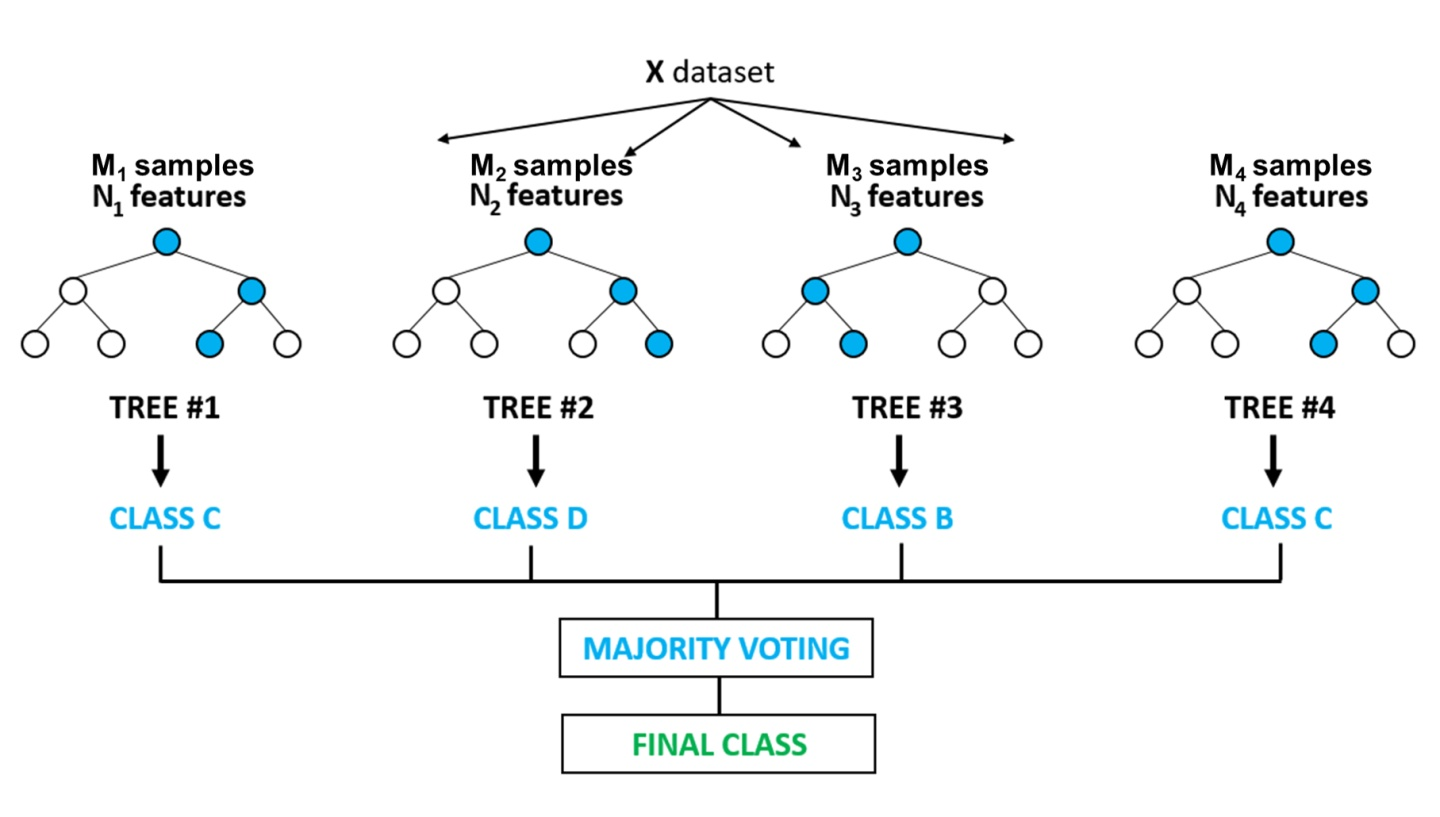

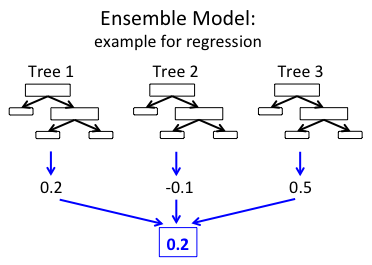

    - mainly focuse at reduce variance by averaging together multiple estimates

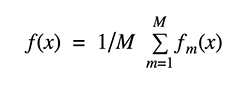
    
  

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier,AdaBoostClassifier
from sklearn import datasets # import inbuild datasets

from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [4]:
score=[]
classifier = DecisionTreeClassifier()

In [5]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [6]:
classifier.score(X_train, y_train),classifier.score(X_test, y_test)

(1.0, 0.9555555555555556)

**<font color='red'>Score 1.0 on training set is overfitting! Let's try ensemble model.</font>**

* Bagging classifier in scikit-learn

    - A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset
    - then aggregate their individual predictions (either by voting or by averaging) to form a final prediction
    - Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it.

In [7]:
rf = RandomForestClassifier(n_estimators=10)

In [8]:
bag_clf = BaggingClassifier(base_estimator=rf, n_estimators=10,
                            bootstrap=True, n_jobs=-1,
                            random_state=42)

bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features='auto',
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        n_estimators=10,
                                                        n_jobs=None,
        

In [9]:
bag_clf.score(X_train,y_train),bag_clf.score(X_test,y_test)

(0.9904761904761905, 0.9777777777777777)

**<font color='red'>the model reduces overfitting.</font>**

  
* **Generic Gradient Boosting**
    - that often considers homogeneous weak learners, learns them `sequentially in a very adaptative way` (a base model depends on the previous ones) and combines them following a `deterministic strategy`
    - such as AdaBoost
    - and XGBoost
    - mainly on producing strong models reducing bias
    <br><br>
    **Basic steps in math**
    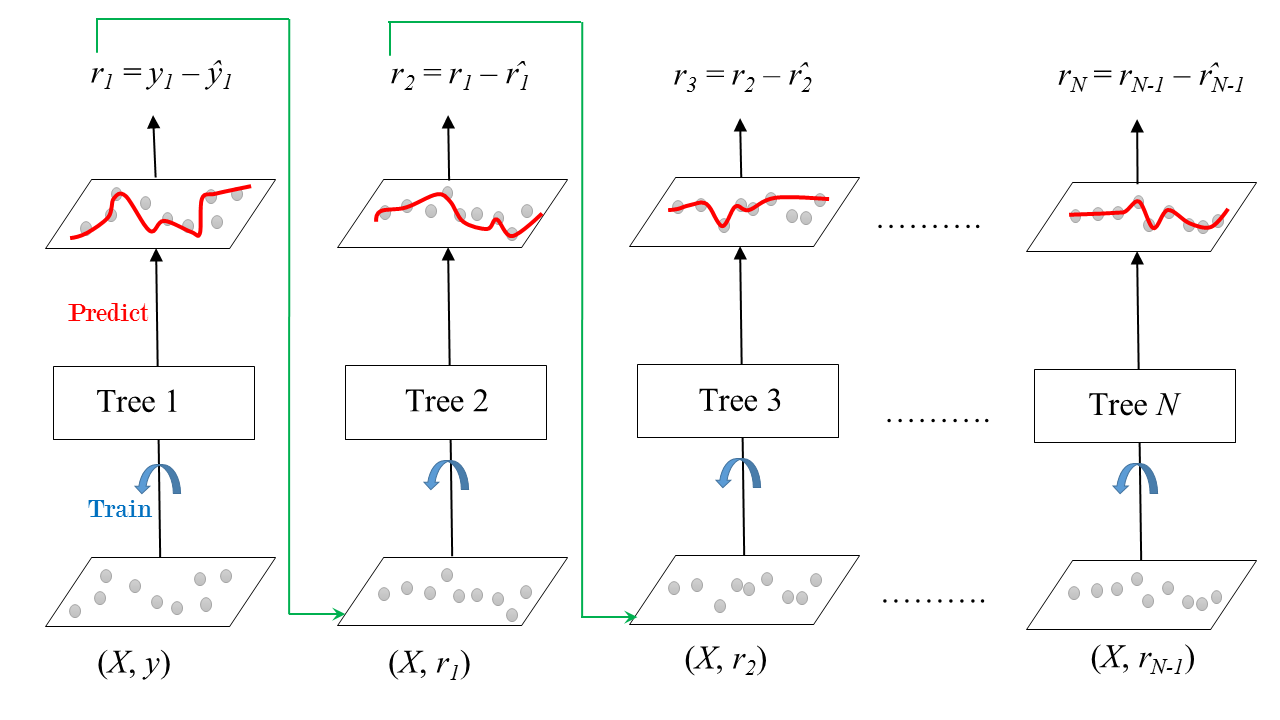
    
    - Let $F(x)$ be our boosting predictor to fit. The goal is always to minimize the loss function:
    
    $$\large minimize \quad L(f) = \sum L(y_i, F(x_i))$$<br>
    
    - So the prediction $\hat{y_i}$ for a given input $x_i$ is of the following form:
    
    $$\large \hat{y_i} = F_M(x_i) = \sum_{m=1}^{M} h_m(x_i)$$
    
    where the $h_m$ are estimators called weak learners in the context of boosting. <br>The constant $M$ corresponds to the `n_estimators` parameter.<br><br>
    
    - Rewrite $ F_m(x)$ in a recursive format
    
    $$\large F_m(x) = F_{m-1}(x) + h_m(x)$$<br>
    
    - Fit $h_m$ in order to minimize a sum of losses $L_m$, given the previous ensemble $F_{m-1}$:
    
    $$\large h_m =  \arg\min_{h} L_m = \arg\min_{h} \sum_{i=1}^{n}l(y_i, F_{m-1}(x_i) + h(x_i))$$<br>
    
    - Using a first-order Taylor approximation, the value of $l$ can be approximated as follows:
    
    $\large l(y_i, F_{m-1}(x_i) + h_m(x_i)) \approx l(y_i, F_{m-1}(x_i)) + h_m(x_i) \left[ \frac{\partial l(y_i, F(x_i))}{\partial F(x_i)} \right]_{F=F_{m - 1}}$<br><br>

    - Compute so-called pseudo-residuals
    
    $$\large r_{im}=-\left[{\frac {\partial L(y_{i},F(x_{i}))}{\partial F(x_{i})}}\right]_{F(x)=F_{m-1}(x)}\quad {\mbox{for }}i=1,\ldots ,n.$$ <br>

    - Fit a base learner (or weak learner, e.g. tree) $ h_{m}(x)$ to pseudo-residuals, i.e. train it using the training set 
    
    $$\large \{(x_{i},r_{im})\}_{i=1}^{n}$$<br>

    - greedy strategy to find the current learner $h_m$ and fits a step length $\gamma_m$ such that the new model $f_{m-1}(x) + \gamma_m h_m(x)$ has min loss
    
    $$\large \gamma_m = argmin \; \sum L(y_i, f_{m-1}(x_i) + \gamma h_m(x_i))$$<br>
    
    - Adding Shrinkage: when we update the model, we can also include a shrinkage strength parameter $ν$, and the updated model is:
    
    $$\large F_m(x) = F_{m-1}(x) + \nu \gamma_m h_m(x)$$
    
        - where parameter $ \nu$  is called the "learning rate".

        - Using small learning rates (such as $ \nu <0.1$ ) yields dramatic improvements 
    
        - lower learning rate requires more iterations
    

* **When loss function is MSE (mean squared error)**

    - The loss function (L) which needs to be optimized can be 
        - Root Mean Squared Error for regression
        - Logloss for binary classification
        - mlogloss for multi-class classification.
        - <font color='red'>Question: can we use MAE (Mean Absolute Error) here?</font>
        - Here we use MSE as an example<br><br>
    
    - the goal is to "teach" a model $F$ to predict values of the form $ {\hat {y}}=F(x)$ by minimizing the mean squared error 
    
    $$\large {\tfrac {1}{n}}\sum _{i}(y_{i}- {\hat {y}}_{i})^{2}$$
    
    where $i$ indexes over some training set of size $n$ of actual values of the output variable $y$
    
    ${\hat {y}}_{i}=$ the predicted value $ F(x)$
    
    $ y_{i}=$ the observed value
    
    $n$ the number of samples in $y$<br><br>
    
    - Using the above Taylor approximation and pseudo-residuals, we have
    
    $$\large L_{\rm {MSE}}={\frac {1}{2}}\left(y-F(x)\right)^{2}$$
    
    $$\large h_{m}(x)=-{\frac {\partial L_{\rm {MSE}}}{\partial F}}=y-F(x)$$  
    
    - Now it becomes the residual that new weak learner will predict
    
    - <font color='red'>Question: For other loss functions, will the residual be the same as $y-F(x)$ ?</font>

* **Gradient boosting approach is like playing golf**
    - Tiger Woods (strong model) may get the ball into the hole by one shot
    - I (weak model) can repeatedly tap the ball more softly, working the ball towards the hole, after reassessing direction and distance to the hole at each stage. Ball will be in hole eventually.
    - So I am almost as strong as Tiger Woods if the goal is to get the ball into the hole regardless of steps.
    

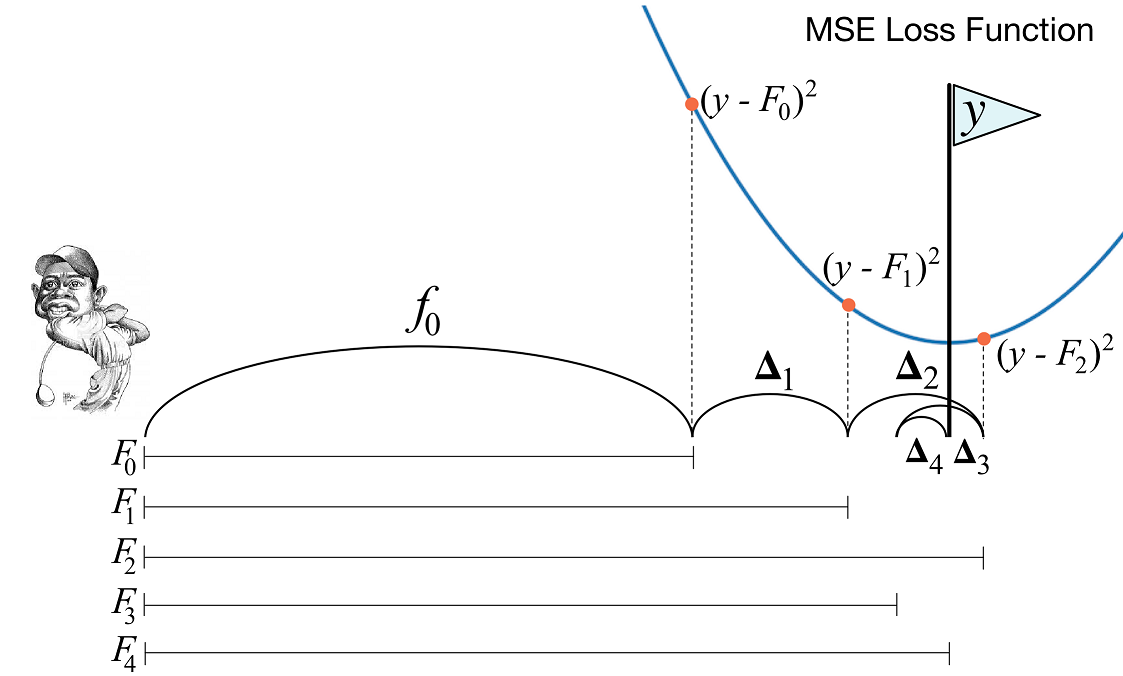

* Gradient boosting approach makes every step similar to Newton-Raphson method so that every step is optimal by repeatedly computing the first order derivatives

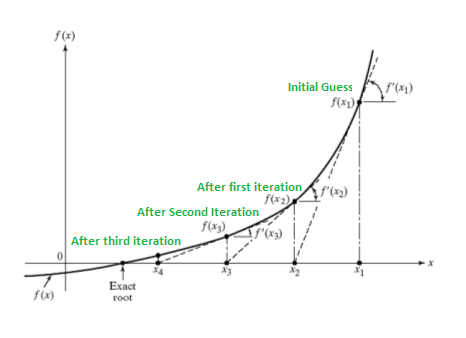

* **Bagging vs Boosting**
    
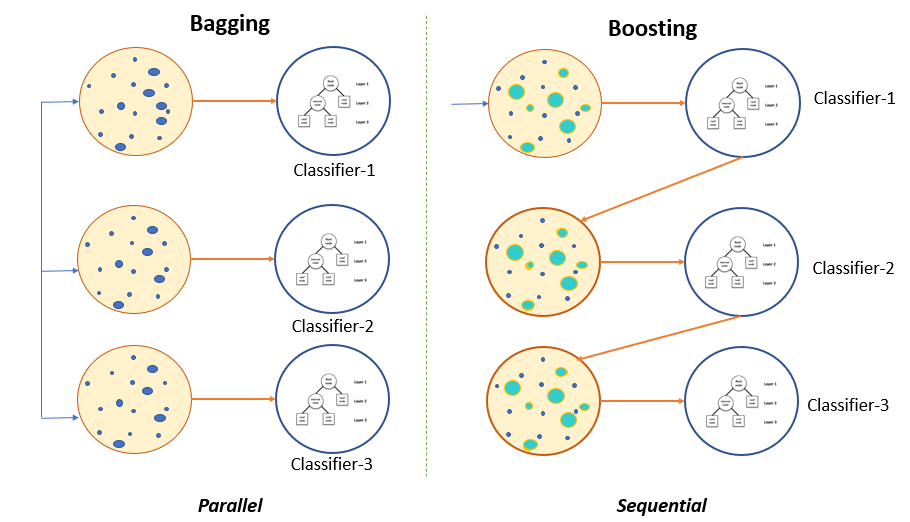

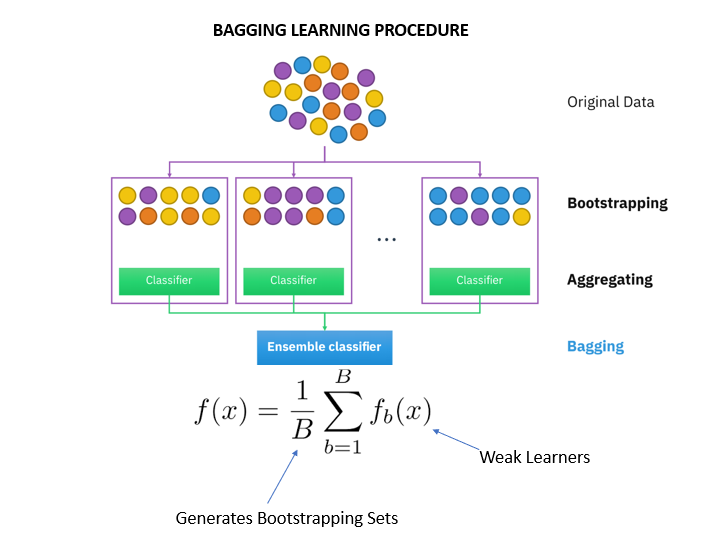

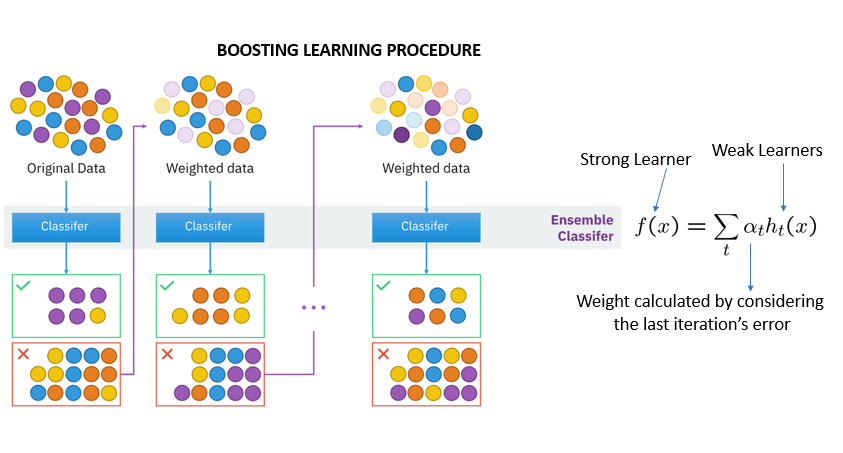

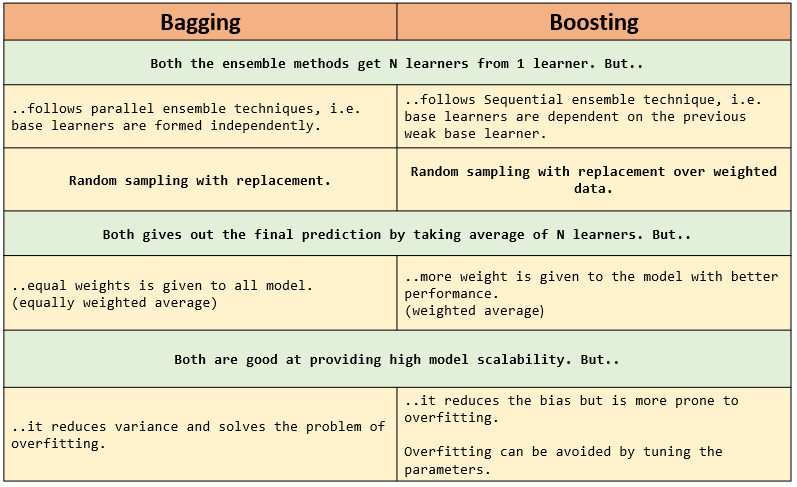

#### <font color='red'>Question: Does Gradient Boosting work for Linear Regression?</font>

Hints:

* what's the assumption for the residuals in linear regression?
* what does a linear regression model look like mathematically?

#### Gradient Boosting example

In [10]:
import pandas as pd
import numpy as np
age_inc_data = pd.DataFrame({'Age':[20, 30, 40, 50, 60, 70],
                            'Income':[2200, 3000, 3600, 4000, 4200, 4300]})
age_inc_copy = age_inc_data.copy()
age_inc_data

,Age,Income
0,20,2200
1,30,3000
2,40,3600
3,50,4000
4,60,4200
5,70,4300


#### Step 1: Start with a weak learner $F_0$

* Build a simple high bias model on this data by predicting the average of income as the prediction. Let us code this up and display the same.

In [11]:
age_inc_copy['F0'] = int(np.average(age_inc_copy['Income']))
age_inc_copy

,Age,Income,F0
0,20,2200,3550
1,30,3000,3550
2,40,3600,3550
3,50,4000,3550
4,60,4200,3550
5,70,4300,3550


#### Step 2: Compute the residuals $r_{im}$ where $m=0$ at this moment

* Calculate residuals $r_{i0}$ for all the inputs.

In [12]:
age_inc_copy['r_i0'] = age_inc_copy['Income'] -age_inc_copy['F0']
age_inc_copy

,Age,Income,F0,r_i0
0,20,2200,3550,-1350
1,30,3000,3550,-550
2,40,3600,3550,50
3,50,4000,3550,450
4,60,4200,3550,650
5,70,4300,3550,750


#### Step 3: Build a weak learner $h_1$

* on age as input and residuals $r_{i0}$ as the target $Y$

In [13]:
# Build a decision stump using age as input and Income-F0 as output.
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(criterion='mse', max_depth = 1)
X = age_inc_copy.drop(['Income','F0', 'r_i0'], axis = 1)
Y = age_inc_copy['r_i0']
dtree.fit(X, Y) # fit the decision tree to the residuals.
# predict the model outputs delta1
y_pred = dtree.predict(X)
age_inc_copy['h_1'] = y_pred
age_inc_copy

,Age,Income,F0,r_i0,h_1
0,20,2200,3550,-1350,-950.0
1,30,3000,3550,-550,-950.0
2,40,3600,3550,50,475.0
3,50,4000,3550,450,475.0
4,60,4200,3550,650,475.0
5,70,4300,3550,750,475.0


C:\Users\David Li\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


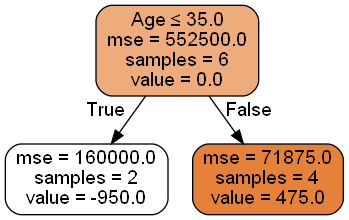

In [14]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names = ['Age'],
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

#### Step 4: Combine $F_0$ and $h_1$ together to make a stronger learner $F_1$

In [15]:
# calculate F1
age_inc_copy['F1'] = age_inc_copy['F0'] + age_inc_copy['h_1']
age_inc_copy

,Age,Income,F0,r_i0,h_1,F1
0,20,2200,3550,-1350,-950.0,2600.0
1,30,3000,3550,-550,-950.0,2600.0
2,40,3600,3550,50,475.0,4025.0
3,50,4000,3550,450,475.0,4025.0
4,60,4200,3550,650,475.0,4025.0
5,70,4300,3550,750,475.0,4025.0


#### Step 5: Compute the residuals $r_{im}$ where $m=1$ at this moment

* Calculate residuals $r_{i1}$ for all the inputs.

In [16]:
#calculate new residuals
age_inc_copy['r_i1'] = age_inc_copy['Income'] - age_inc_copy['F1']
age_inc_copy

,Age,Income,F0,r_i0,h_1,F1,r_i1
0,20,2200,3550,-1350,-950.0,2600.0,-400.0
1,30,3000,3550,-550,-950.0,2600.0,400.0
2,40,3600,3550,50,475.0,4025.0,-425.0
3,50,4000,3550,450,475.0,4025.0,-25.0
4,60,4200,3550,650,475.0,4025.0,175.0
5,70,4300,3550,750,475.0,4025.0,275.0


#### Step 6: Build a weak learner $h_2$

* on age as input and residuals $r_{i1}$ as the target $Y$

In [17]:
# Build a decision stump using age as input and Income-F1 as output.
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(criterion='mse', max_depth = 1)
X = age_inc_data.drop(['Income'], axis = 1)
Y = age_inc_copy['r_i1']
dtree.fit(X, Y)
# predict the model outputs delta1
y_pred = dtree.predict(X)
age_inc_copy['h_2'] = y_pred
age_inc_copy

,Age,Income,F0,r_i0,h_1,F1,r_i1,h_2
0,20,2200,3550,-1350,-950.0,2600.0,-400.0,-400.0
1,30,3000,3550,-550,-950.0,2600.0,400.0,80.0
2,40,3600,3550,50,475.0,4025.0,-425.0,80.0
3,50,4000,3550,450,475.0,4025.0,-25.0,80.0
4,60,4200,3550,650,475.0,4025.0,175.0,80.0
5,70,4300,3550,750,475.0,4025.0,275.0,80.0


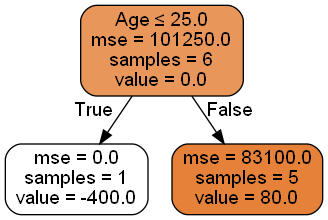

In [18]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names = ['Age'],
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

#### Step 7: Combine $F_1$ and $h_2$ together to make a stronger learner $F_2$

In [19]:
# calculate F2
age_inc_copy['F2'] = age_inc_copy['F1'] + age_inc_copy['h_2']
age_inc_copy

,Age,Income,F0,r_i0,h_1,F1,r_i1,h_2,F2
0,20,2200,3550,-1350,-950.0,2600.0,-400.0,-400.0,2200.0
1,30,3000,3550,-550,-950.0,2600.0,400.0,80.0,2680.0
2,40,3600,3550,50,475.0,4025.0,-425.0,80.0,4105.0
3,50,4000,3550,450,475.0,4025.0,-25.0,80.0,4105.0
4,60,4200,3550,650,475.0,4025.0,175.0,80.0,4105.0
5,70,4300,3550,750,475.0,4025.0,275.0,80.0,4105.0


#### Step 8: Compute the residuals $r_{im}$ where $m=2$ at this moment

* Calculate residuals $r_{i2}$ for all the inputs.

In [20]:
#calculate new residuals
age_inc_copy['r_i2'] = age_inc_copy['Income'] - age_inc_copy['F2']
age_inc_copy

,Age,Income,F0,r_i0,h_1,F1,r_i1,h_2,F2,r_i2
0,20,2200,3550,-1350,-950.0,2600.0,-400.0,-400.0,2200.0,0.0
1,30,3000,3550,-550,-950.0,2600.0,400.0,80.0,2680.0,320.0
2,40,3600,3550,50,475.0,4025.0,-425.0,80.0,4105.0,-505.0
3,50,4000,3550,450,475.0,4025.0,-25.0,80.0,4105.0,-105.0
4,60,4200,3550,650,475.0,4025.0,175.0,80.0,4105.0,95.0
5,70,4300,3550,750,475.0,4025.0,275.0,80.0,4105.0,195.0


#### Repeat step 6,7,8

In [21]:
# Build a decision stump using age as input and Income-F1 as output.
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(criterion='mse', max_depth = 1)
X = age_inc_data.drop(['Income'], axis = 1)
Y = age_inc_copy['r_i2']
dtree.fit(X, Y)
# predict the model outputs delta1
y_pred = dtree.predict(X)
age_inc_copy['h_3'] = y_pred
age_inc_copy['F3'] = age_inc_copy['F2'] + age_inc_copy['h_3']
age_inc_copy['r_i3'] = age_inc_copy['Income'] - age_inc_copy['F3']
age_inc_copy

,Age,Income,F0,r_i0,h_1,F1,r_i1,h_2,F2,r_i2,h_3,F3,r_i3
0,20,2200,3550,-1350,-950.0,2600.0,-400.0,-400.0,2200.0,0.0,160.0,2360.0,-160.0
1,30,3000,3550,-550,-950.0,2600.0,400.0,80.0,2680.0,320.0,160.0,2840.0,160.0
2,40,3600,3550,50,475.0,4025.0,-425.0,80.0,4105.0,-505.0,-80.0,4025.0,-425.0
3,50,4000,3550,450,475.0,4025.0,-25.0,80.0,4105.0,-105.0,-80.0,4025.0,-25.0
4,60,4200,3550,650,475.0,4025.0,175.0,80.0,4105.0,95.0,-80.0,4025.0,175.0
5,70,4300,3550,750,475.0,4025.0,275.0,80.0,4105.0,195.0,-80.0,4025.0,275.0


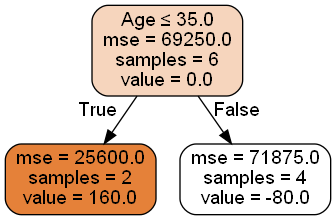

In [22]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names = ['Age'],
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

#### Model evaluation by RMSE $= \sqrt{\frac{1}{n}\sum_{t=1}^{n}residual_t^2}$ shows that gradient boosting is getting better model

In [23]:
print(np.sqrt(np.mean(age_inc_copy['r_i0']**2)),
      np.sqrt(np.mean(age_inc_copy['r_i1']**2)),
      np.sqrt(np.mean(age_inc_copy['r_i2']**2)),
      np.sqrt(np.mean(age_inc_copy['r_i3']**2)))

743.3034373659252 318.1980515339464 263.1539473388153 237.59208741033444


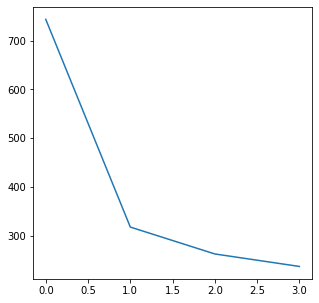

In [89]:
from matplotlib import pyplot as plt
plt.plot([np.sqrt(np.mean(age_inc_copy['r_i0']**2)),
      np.sqrt(np.mean(age_inc_copy['r_i1']**2)),
      np.sqrt(np.mean(age_inc_copy['r_i2']**2)),
      np.sqrt(np.mean(age_inc_copy['r_i3']**2))])
plt.show()

**<font color='red'>Questions: If we keep doing the iterations to add more and more models $h_i$, would it be overfitting?</font>**

* **Stacking**
    - that often considers `heterogeneous` weak learners, learns them in parallel and `combines them by training a meta-model` to output a prediction based on the different weak models predictions
    - The base level models are trained based on a complete training set, then the meta-model is trained on the outputs of the base level model as features.
    - mainly focus on improving predictions
    
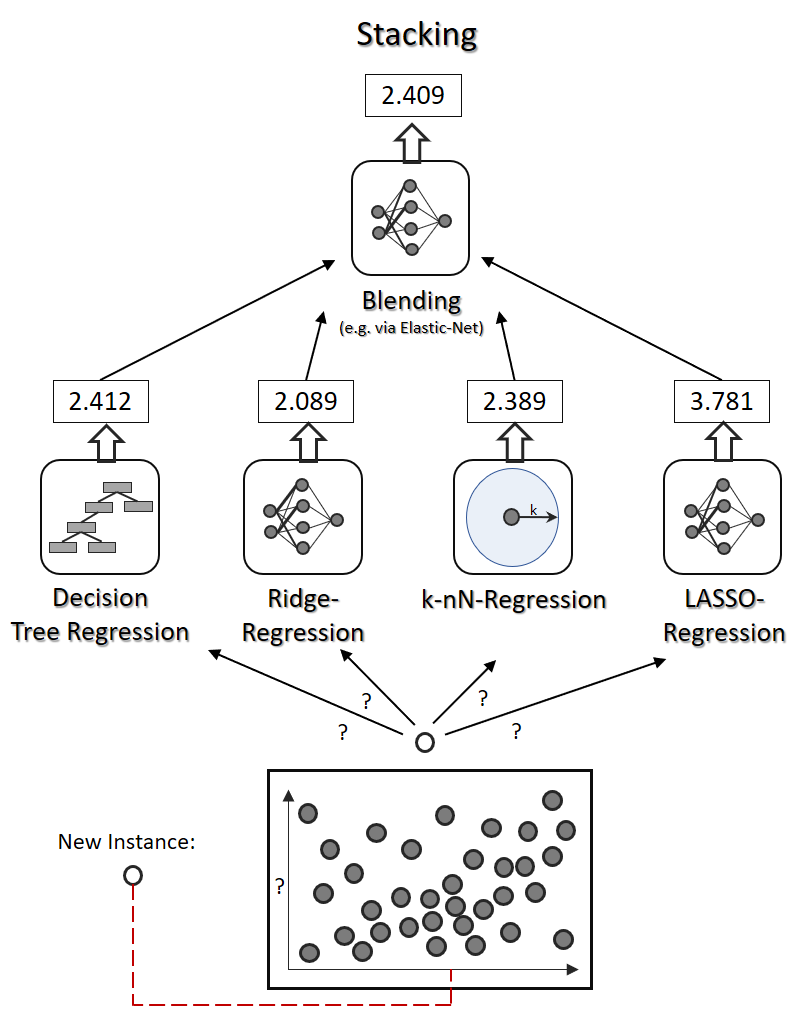

### XGBoost

#### XGBoost used a more regularized model formalization to control over-fitting, which gives it better performance”. 
#### <p style='text-align: right;'>-- Tianqi Chen, the author of XGBoost</p>

XGBoost is one of the most popular machine learning algorithm: regression or classification.

* Speed and performance : Originally written in C++, it is comparatively faster than other ensemble classifiers.
( Core algorithm is parallelizable : Because the core XGBoost algorithm is parallelizable it can harness the power of multi-core computers. It is also parallelizable onto GPU’s and across networks of computers making it feasible to train on very large datasets as well.
* Consistently outperforms other algorithm methods : It has shown better performance on a variety of machine learning benchmark datasets.
* Wide variety of tuning parameters : XGBoost internally has parameters for cross-validation, regularization, user-defined objective functions, missing values, tree parameters, scikit-learn compatible API etc. They make sure both bias and variance is kept at a minimal. 
* The advantage of in-built parameters is that it leads to faster implementation.

#### Some Basic Concepts

* The default base learners of XGBoost: tree ensembles
* The tree ensemble model is a set of classification and regression trees (CART)
* Trees are grown one after another ,and attempts to reduce the misclassification rate are made in subsequent iterations

#### XGBoost is an advanced version of gradient boosting

* boosting model is

    $$\large \hat{y}_i = \sum_{k=1}^K f_k(x_i), f_k \in \mathcal{F}$$
    - where $K$ is the number of trees, 
    - $f$ is a function in the functional space $F$, 
    - $F$ is the set of all possible CARTs.
<br><br>

* the prediction value is
    $$\large \begin{split}\hat{y}_i^{(0)} &= 0\\
\hat{y}_i^{(1)} &= f_1(x_i) = \hat{y}_i^{(0)} + f_1(x_i)\\
\hat{y}_i^{(2)} &= f_1(x_i) + f_2(x_i)= \hat{y}_i^{(1)} + f_2(x_i)\\
&\dots\\
\hat{y}_i^{(t)} &= \sum_{k=1}^t f_k(x_i)= \hat{y}_i^{(t-1)} + f_t(x_i)\end{split}$$<br><br>

*  objective function (contains training loss and regularization)

    $$\large \text{obj} = \sum_{i=1}^n l(y_i, \hat{y}_i^{(t)}) + \sum_{i=1}^t\Omega(f_i)$$

* the regularization or model complexity is defined 

    $$\large \Omega(f) = \gamma T + \frac{1}{2}\lambda \sum_{j=1}^T w_j^2$$
    - $T$ is the number of leaves
    - $w$  is the vector of scores on leaves<br><br>
    
* for example

    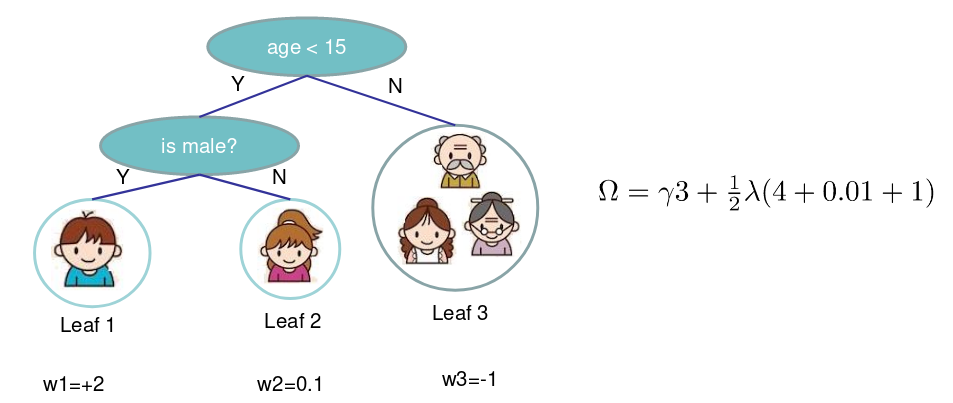
    
* <font color='red'>Intuitively, the regularized objective will tend to select a model employing simple and predictive functions</font>

* When the regularization parameter is set to zero, the objective falls back to the traditional gradient tree boosting.


#### Getting started with XGBoost

* Install
    - pip install xgboost
    
* Short example
    - https://xgboost.readthedocs.io/en/latest/get_started.html
    
* XGBoost is also available in many other packages
    - h2o
    - spark
    - pyod

In [25]:
# !pip install xgboost

In [91]:
from sklearn import datasets
import xgboost as xgb

iris = datasets.load_iris()
X = iris.data
y = iris.target

In [92]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=2)

#### Convert to DMatrix for xgboost

In [93]:
D_train = xgb.DMatrix(X_train, label=Y_train)
D_test = xgb.DMatrix(X_test, label=Y_test)

In [99]:
D_train.feature_names

['f0', 'f1', 'f2', 'f3']

In [100]:
X_train

array([[6.1, 2.6, 5.6, 1.4],
       [5.2, 3.4, 1.4, 0.2],
       [6.7, 3.1, 4.4, 1.4],
       [5.1, 3.5, 1.4, 0.2],
       [5.2, 3.5, 1.5, 0.2],
       [5.5, 3.5, 1.3, 0.2],
       [4.9, 2.5, 4.5, 1.7],
       [6.2, 3.4, 5.4, 2.3],
       [7.9, 3.8, 6.4, 2. ],
       [5.4, 3.4, 1.7, 0.2],
       [6.7, 3.1, 5.6, 2.4],
       [6.3, 3.4, 5.6, 2.4],
       [7.6, 3. , 6.6, 2.1],
       [6. , 2.2, 5. , 1.5],
       [4.3, 3. , 1.1, 0.1],
       [4.8, 3.1, 1.6, 0.2],
       [5.8, 2.7, 5.1, 1.9],
       [5.7, 2.8, 4.1, 1.3],
       [5.2, 2.7, 3.9, 1.4],
       [7.7, 3. , 6.1, 2.3],
       [6.3, 2.7, 4.9, 1.8],
       [6.1, 2.8, 4. , 1.3],
       [5.1, 3.7, 1.5, 0.4],
       [5.7, 2.8, 4.5, 1.3],
       [5.4, 3.9, 1.3, 0.4],
       [5.8, 2.8, 5.1, 2.4],
       [5.8, 2.6, 4. , 1.2],
       [5.1, 2.5, 3. , 1.1],
       [5.7, 3.8, 1.7, 0.3],
       [5.5, 2.4, 3.7, 1. ],
       [5.9, 3. , 4.2, 1.5],
       [6.7, 3.1, 4.7, 1.5],
       [7.7, 2.8, 6.7, 2. ],
       [4.9, 3. , 1.4, 0.2],
       [6.3, 3

#### Defining an XGBoost model

* the parameters
    - max_depth: maximum depth of the decision trees being trained
    - objective: the loss function being used
    - num_class: the number of classes in the dataset
    - eta: learning rate to prevent overfitting
    
* More thoughts about eta

    - In the above Age-Income model, we simply add the predictions of new trees to the ensemble with full weight, which may cause overfitting. 
    - the eta will be multiplied by the residuals being adding to reduce their weight. 
    - This effectively reduces the complexity of the overall model.
    - It is common to have small values in the range of 0.1 to 0.3. 
    - The smaller eta will still help us train a powerful model
    - and it won’t let that model run away into deep complexity where overfitting is more likely to happen.

In [59]:
param = {
    'eta': 0.3, 
    'max_depth': 3,  # depth of the trees in the boosting process
    'objective': 'multi:softprob',  # error evaluation for multiclass tasks
    'num_class': 3} # number of classes to predict

steps = 5  # The number of training iterations

#### Training your model

In [60]:
model = xgb.train(param, D_train, steps)

#### Model Evaluation

In [61]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

print("Precision = {}".format(precision_score(Y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(Y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(Y_test, best_preds)))

Precision = 0.9761904761904763
Recall = 0.9777777777777779
Accuracy = 0.9777777777777777


**<font color='red'>We are done with XGBoost! </font>**



#### Can we make accuracy better?

* make the eta smaller so that it won't overfit. 
* make max_depth bigger
* increase steps

In [118]:
param = {
    'eta': 0.001, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 3} 

steps = 200  # The number of training iterations

model = xgb.train(param, D_train, steps)
preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

print("Precision = {}".format(precision_score(Y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(Y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(Y_test, best_preds)))

Precision = 0.9761904761904763
Recall = 0.9777777777777779
Accuracy = 0.9777777777777777


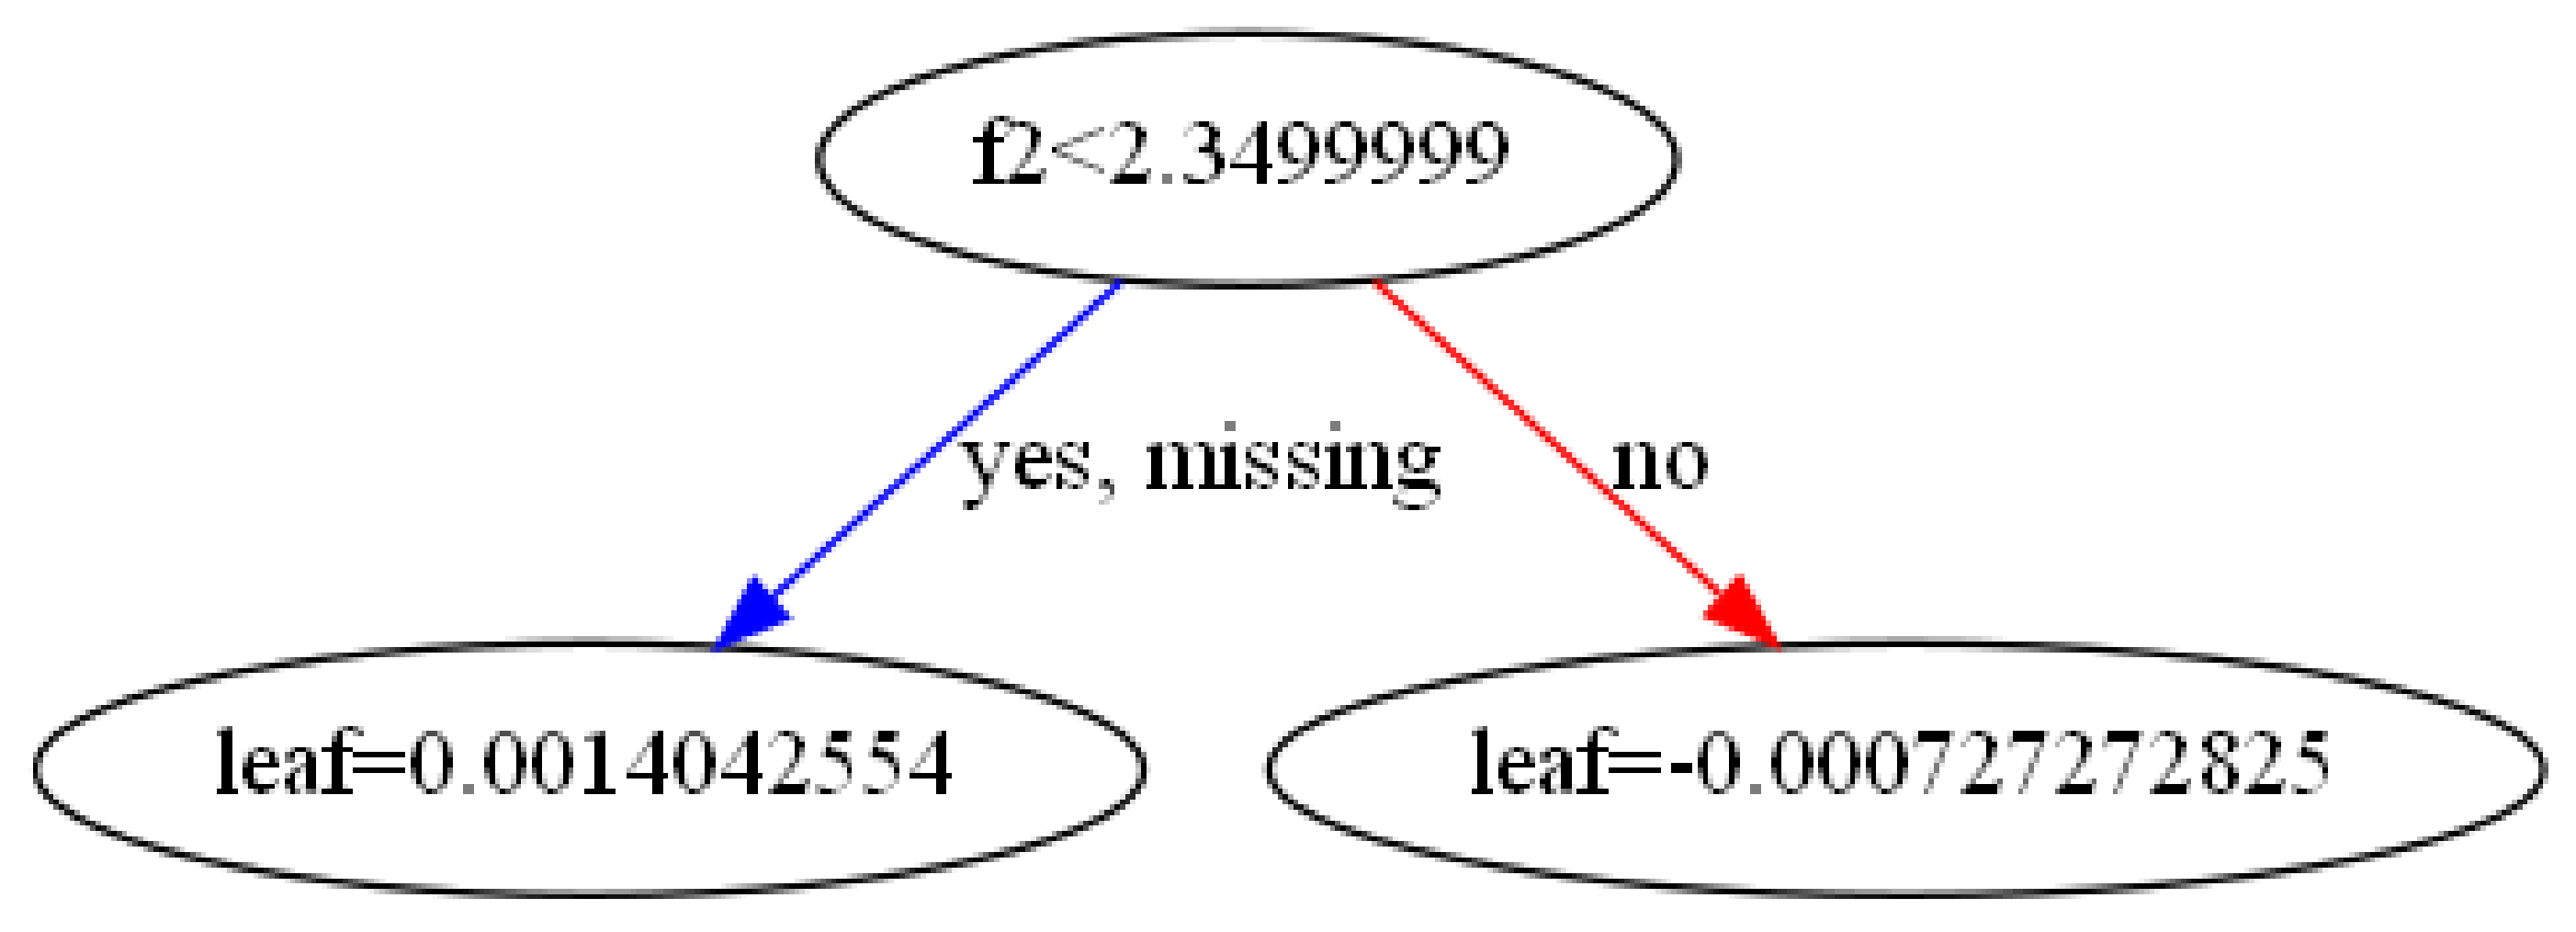

In [122]:
xgb.plot_tree(model,num_trees=0)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

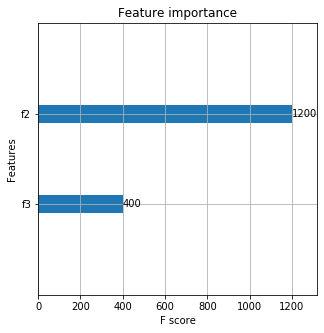

In [95]:
xgb.plot_importance(model)

In [87]:
from xgboost import XGBClassifier
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=3)
model=xgb.XGBClassifier(random_state=1,learning_rate=0.001)
model.fit(X_train, Y_train)
model.score(X_test,Y_test)

0.9777777777777777

#### XGBoost for regression

* Dataset
    - It has 14 explanatory variables describing various aspects of residential homes in Boston
* the challenge is to predict the median value of owner-occupied homes per $1000s. 

In [101]:
from sklearn.datasets import load_boston
boston = load_boston()

import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [102]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [103]:
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names

In [104]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


You'll notice that there is no column called PRICE in the DataFrame. This is because the target column is available in another attribute called boston.target. Append boston.target to your pandas DataFrame.

In [105]:
data['PRICE'] = boston.target

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


Turns out that this dataset has 14 columns (including the target variable `PRICE`) and 506 rows. Notice that the columns are of float data-type indicating the presence of only continuous features with no missing values in any of the columns.

If you plan to use XGBoost on a dataset which has categorical features you may want to consider applying some encoding (like one-hot encoding) to such features before training the model. Also, if you have some missing values such as `NA` in the dataset you may or may not do a separate treatment for them, because XGBoost is capable of handling missing values internally.

Without delving into more exploratory analysis and feature engineering, you will now focus on applying the algorithm to train the model on this data.

You will build the model using Trees as base learners (which are the default base learners) using XGBoost's scikit-learn compatible API. Along the way, you will also learn some of the common tuning parameters which XGBoost provides in order to improve the model's performance, and using the root mean squared error (RMSE) performance metric to check the performance of the trained model on the test set. Root mean Squared error is the square root of the mean of the squared differences between the actual and the predicted values. As usual, you start by importing the library xgboost and other important libraries that you will be using for building the model.

In [107]:
X, y = data.iloc[:,:-1],data.iloc[:,-1]

In [108]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

The next step is to instantiate an XGBoost regressor object by calling the `XGBRegressor()` class from the XGBoost library with the hyper-parameters passed as arguments. For classification problems, you would have used the `XGBClassifier()` class.

In [110]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [111]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

In [112]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 10.423243


you can see that your RMSE for the price prediction came out to be around 10 per 1000$.

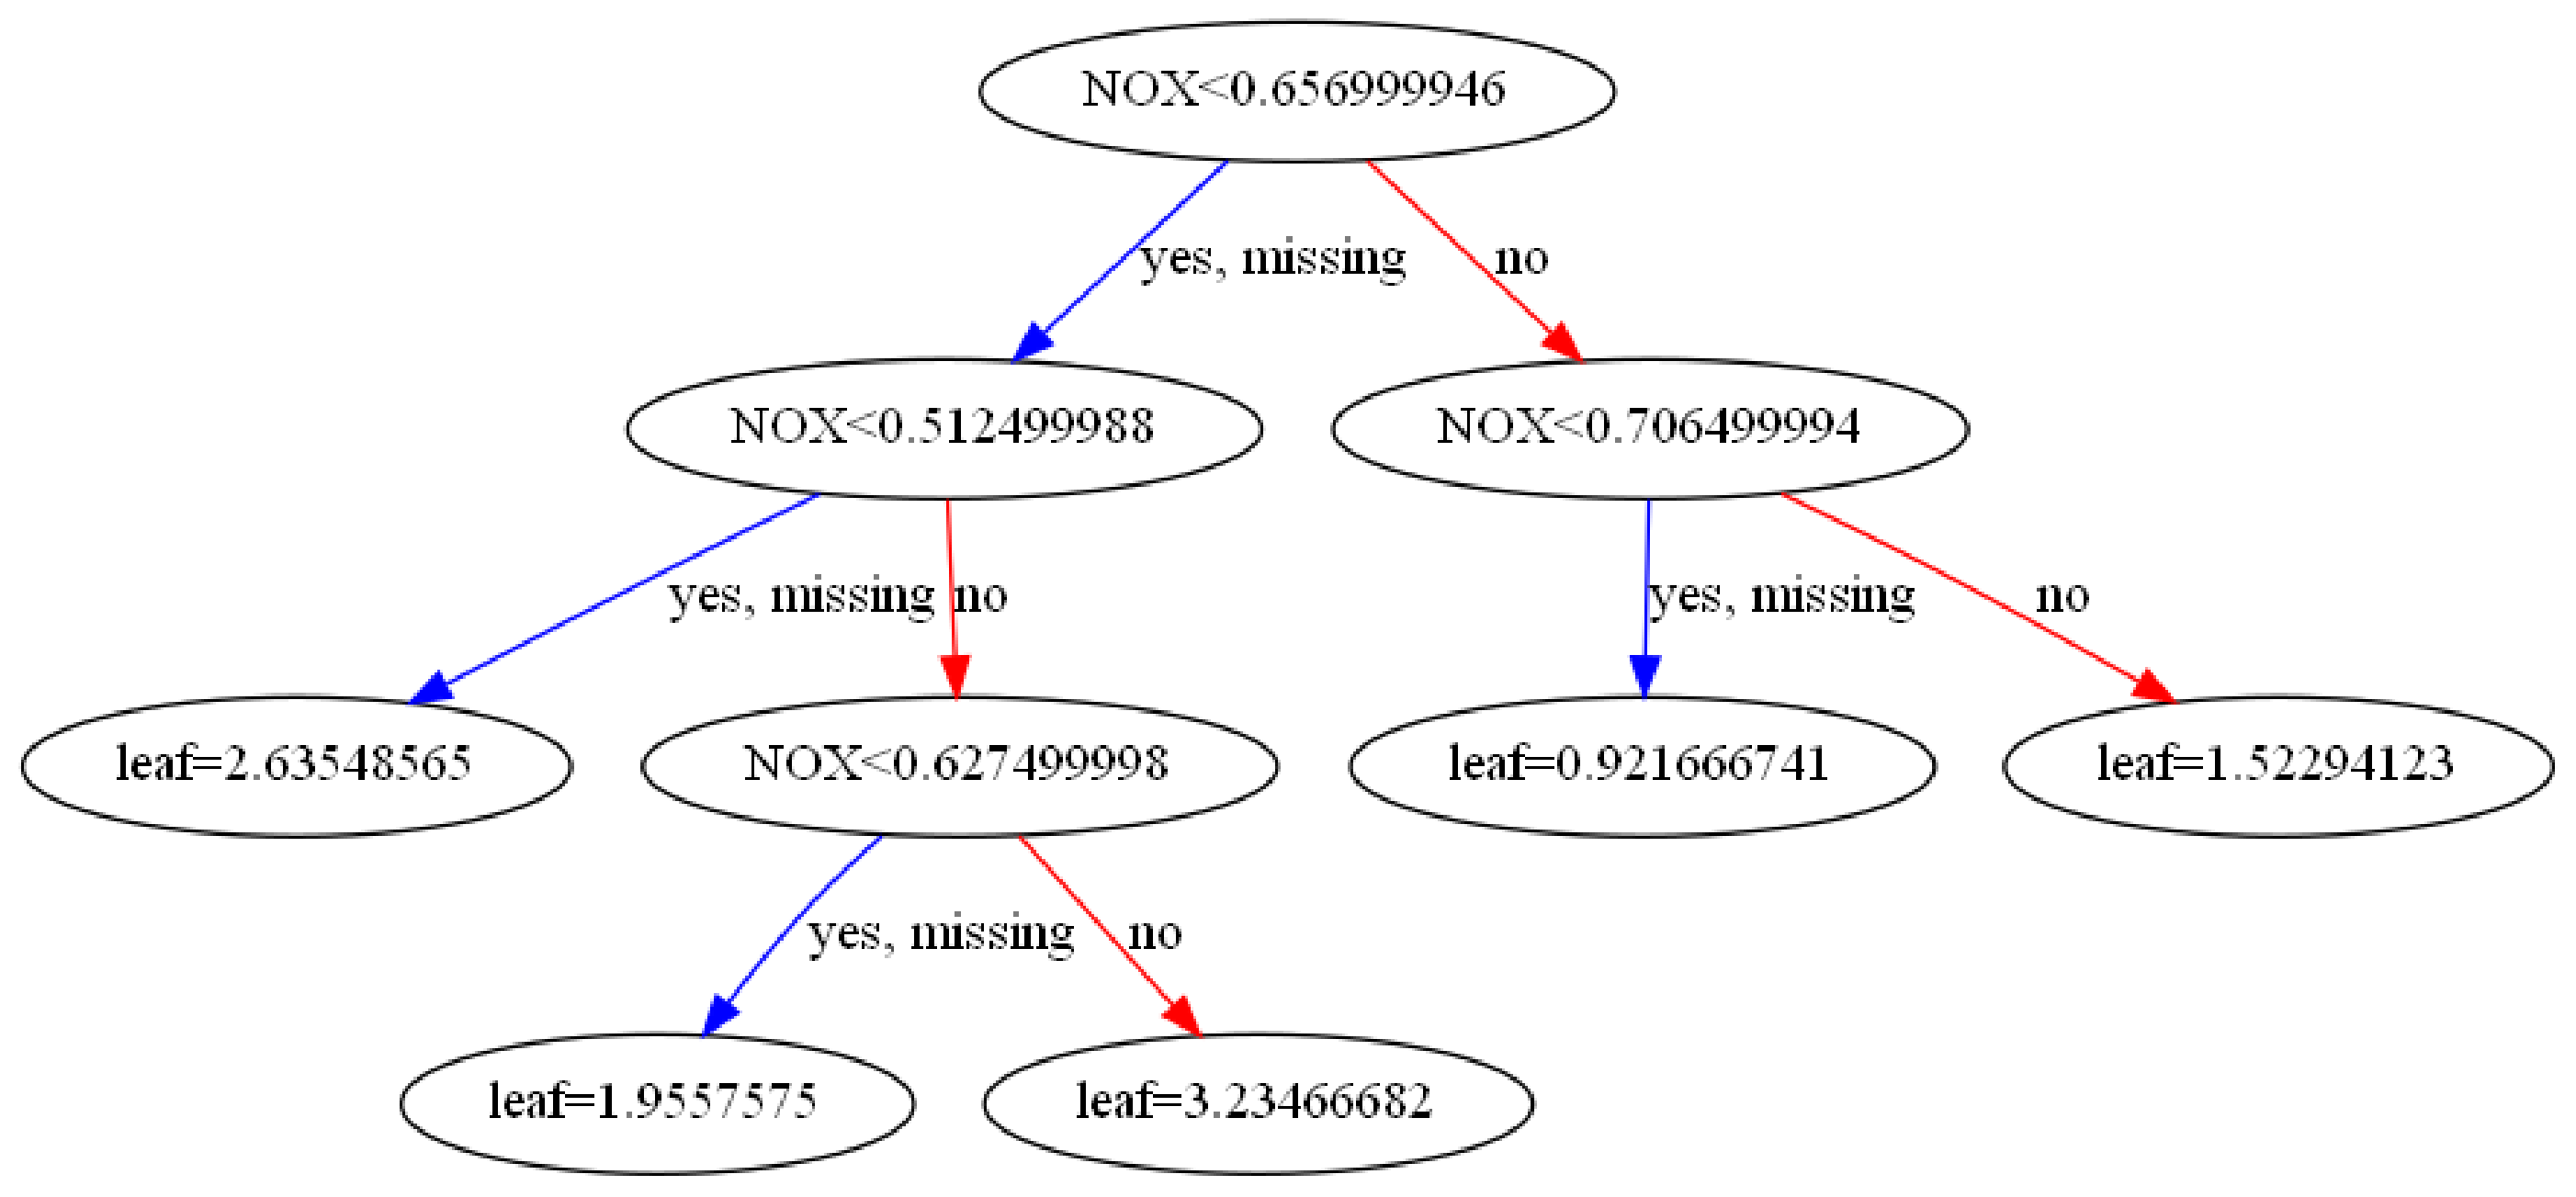

In [116]:
xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

#### XGBoost contains an inbuilt function to compute the feature importance and we don’t have to worry about coding it in the model. 


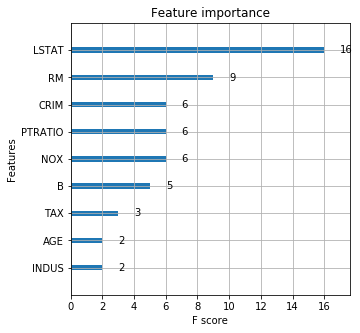

In [117]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

References:

XGBoost: A Scalable Tree Boosting System<br>
https://arxiv.org/pdf/1603.02754

https://liyanxu.blog/2018/10/29/gradient-boosting-vs-forward-stagewise-boosting/

https://blog.quantinsti.com/xgboost-python/

https://www.pluralsight.com/guides/ensemble-methods:-bagging-versus-boosting

https://towardsdatascience.com/a-beginners-guide-to-xgboost-87f5d4c30ed7

https://medium.com/gradient-boosting-working-limitations-time/gradient-boosting-working-and-applications-28e8d4ba866d

https://blog.cambridgespark.com/hyperparameter-tuning-in-xgboost-4ff9100a3b2f

https://www.hackerearth.com/practice/machine-learning/machine-learning-algorithms/beginners-tutorial-on-xgboost-parameter-tuning-r/tutorial/

https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/

https://www.researchgate.net/figure/Gradient-boosted-decision-tree-ensemble_fig4_281513259

https://www.researchgate.net/figure/A-simple-example-of-visualizing-gradient-boosting_fig5_326379229

https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/

https://hackernoon.com/want-a-complete-guide-for-xgboost-model-in-python-using-scikit-learn-sc11f31bq


